In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All libraries imported successfully!")


All libraries imported successfully!


In [2]:
# Load metadata
csv_path = 'state-farm-distracted-driver-detection/driver_imgs_list.csv'
df = pd.read_csv(csv_path)

# Display basic info
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"\nDataset Shape: {df.shape}")
print(f"Total Images: {len(df)}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nData Types:")
print(df.dtypes)
print(f"\nMissing Values:")
print(df.isnull().sum())
print("\n Data loaded successfully!")


DATASET INFORMATION

Dataset Shape: (22424, 3)
Total Images: 22424

First 5 rows:
  subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg

Data Types:
subject      object
classname    object
img          object
dtype: object

Missing Values:
subject      0
classname    0
img          0
dtype: int64

 Data loaded successfully!



CLASS DISTRIBUTION
classname
c0    2489
c1    2267
c2    2317
c3    2346
c4    2326
c5    2312
c6    2325
c7    2002
c8    1911
c9    2129
Name: count, dtype: int64


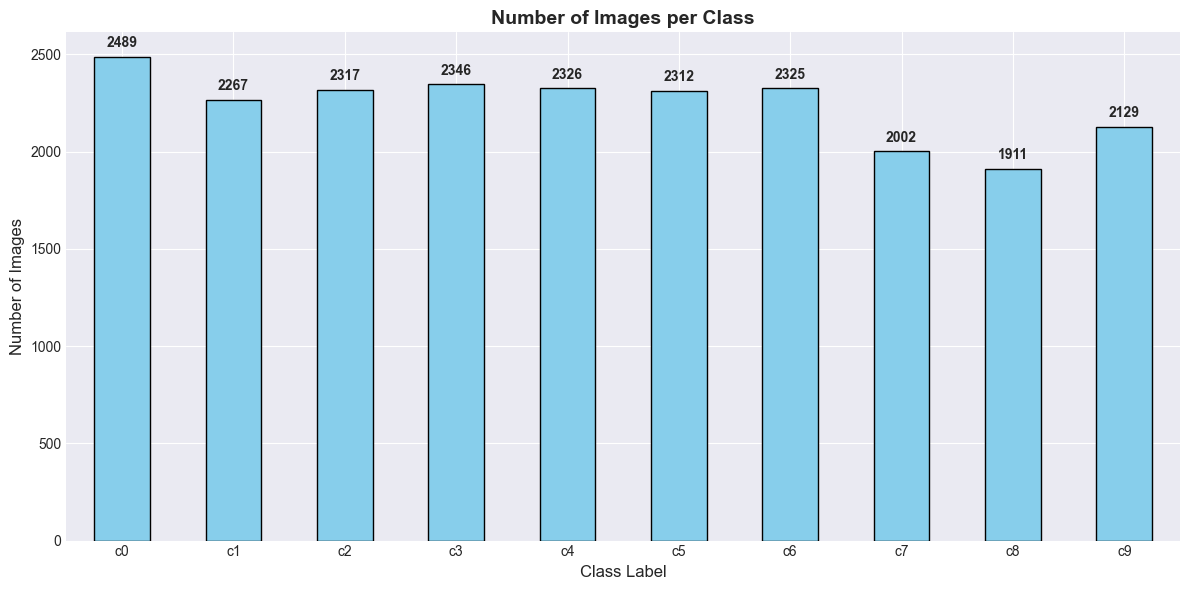


Class Balance Ratio (max/min): 1.30
Classes are well-balanced


In [3]:
# Class distribution
class_counts = df['classname'].value_counts().sort_index()
print("\n" + "=" * 60)
print("CLASS DISTRIBUTION")
print("=" * 60)
print(class_counts)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
class_counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
plt.title('Number of Images per Class', fontsize=14, fontweight='bold')
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on bars
for i, v in enumerate(class_counts):
    ax.text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Check balance
balance_ratio = class_counts.max() / class_counts.min()
print(f"\nClass Balance Ratio (max/min): {balance_ratio:.2f}")
if balance_ratio > 1.5:
    print("Classes are somewhat imbalanced - may need augmentation")
else:
    print("Classes are well-balanced")


In [8]:
img_folder = 'state-farm-distracted-driver-detection/imgs/train'
dimensions = []
file_sizes = []
missing_count = 0

print("\n" + "=" * 60)
print("CHECKING IMAGE PROPERTIES (sampling up to 100 images)")
print("=" * 60)

sample_indices = np.random.choice(len(df), min(100, len(df)), replace=False)

for idx in sample_indices:
    row = df.iloc[idx]
    img_path = os.path.join(img_folder, row['classname'], row['img'])
    try:
        img = Image.open(img_path)
        dimensions.append(img.size)
        file_sizes.append(os.path.getsize(img_path) / 1024)
    except FileNotFoundError:
        missing_count += 1
    except Exception as e:
        missing_count += 1

if len(dimensions) > 0:
    width_height = np.array(dimensions)
    print(f"\nSuccessfully loaded: {len(dimensions)} images")
    print(f"Missing or inaccessible: {missing_count} images")
    print(f"\nImage Dimensions Summary:")
    print(f"  Width  - Min: {width_height[:, 0].min()}, Max: {width_height[:, 0].max()}, Mean: {width_height[:, 0].mean():.1f}")
    print(f"  Height - Min: {width_height[:, 1].min()}, Max: {width_height[:, 1].max()}, Mean: {width_height[:, 1].mean():.1f}")
    print(f"  Unique Dimensions: {len(set(dimensions))}")
    print(f"\nFile Size (KB):")
    print(f"  Min: {min(file_sizes):.1f}, Max: {max(file_sizes):.1f}, Mean: {np.mean(file_sizes):.1f}")
    
    if len(set(dimensions)) == 1:
        print(f"\nAll images have uniform size: {dimensions[0]}")
    else:
        print(f"\nImages have {len(set(dimensions))} different sizes")
        print(f"Common sizes: {Counter(dimensions).most_common(5)}")
else:
    print("\nNo images could be loaded. Check that the dataset is extracted properly.")
    print("Ensure images are in: state-farm-distracted-driver-detection/imgs/train/c0-c9/")



CHECKING IMAGE PROPERTIES (sampling up to 100 images)

Successfully loaded: 100 images
Missing or inaccessible: 0 images

Image Dimensions Summary:
  Width  - Min: 640, Max: 640, Mean: 640.0
  Height - Min: 480, Max: 480, Mean: 480.0
  Unique Dimensions: 1

File Size (KB):
  Min: 33.4, Max: 48.0, Mean: 41.1

All images have uniform size: (640, 480)



SAMPLE IMAGES FROM EACH CLASS


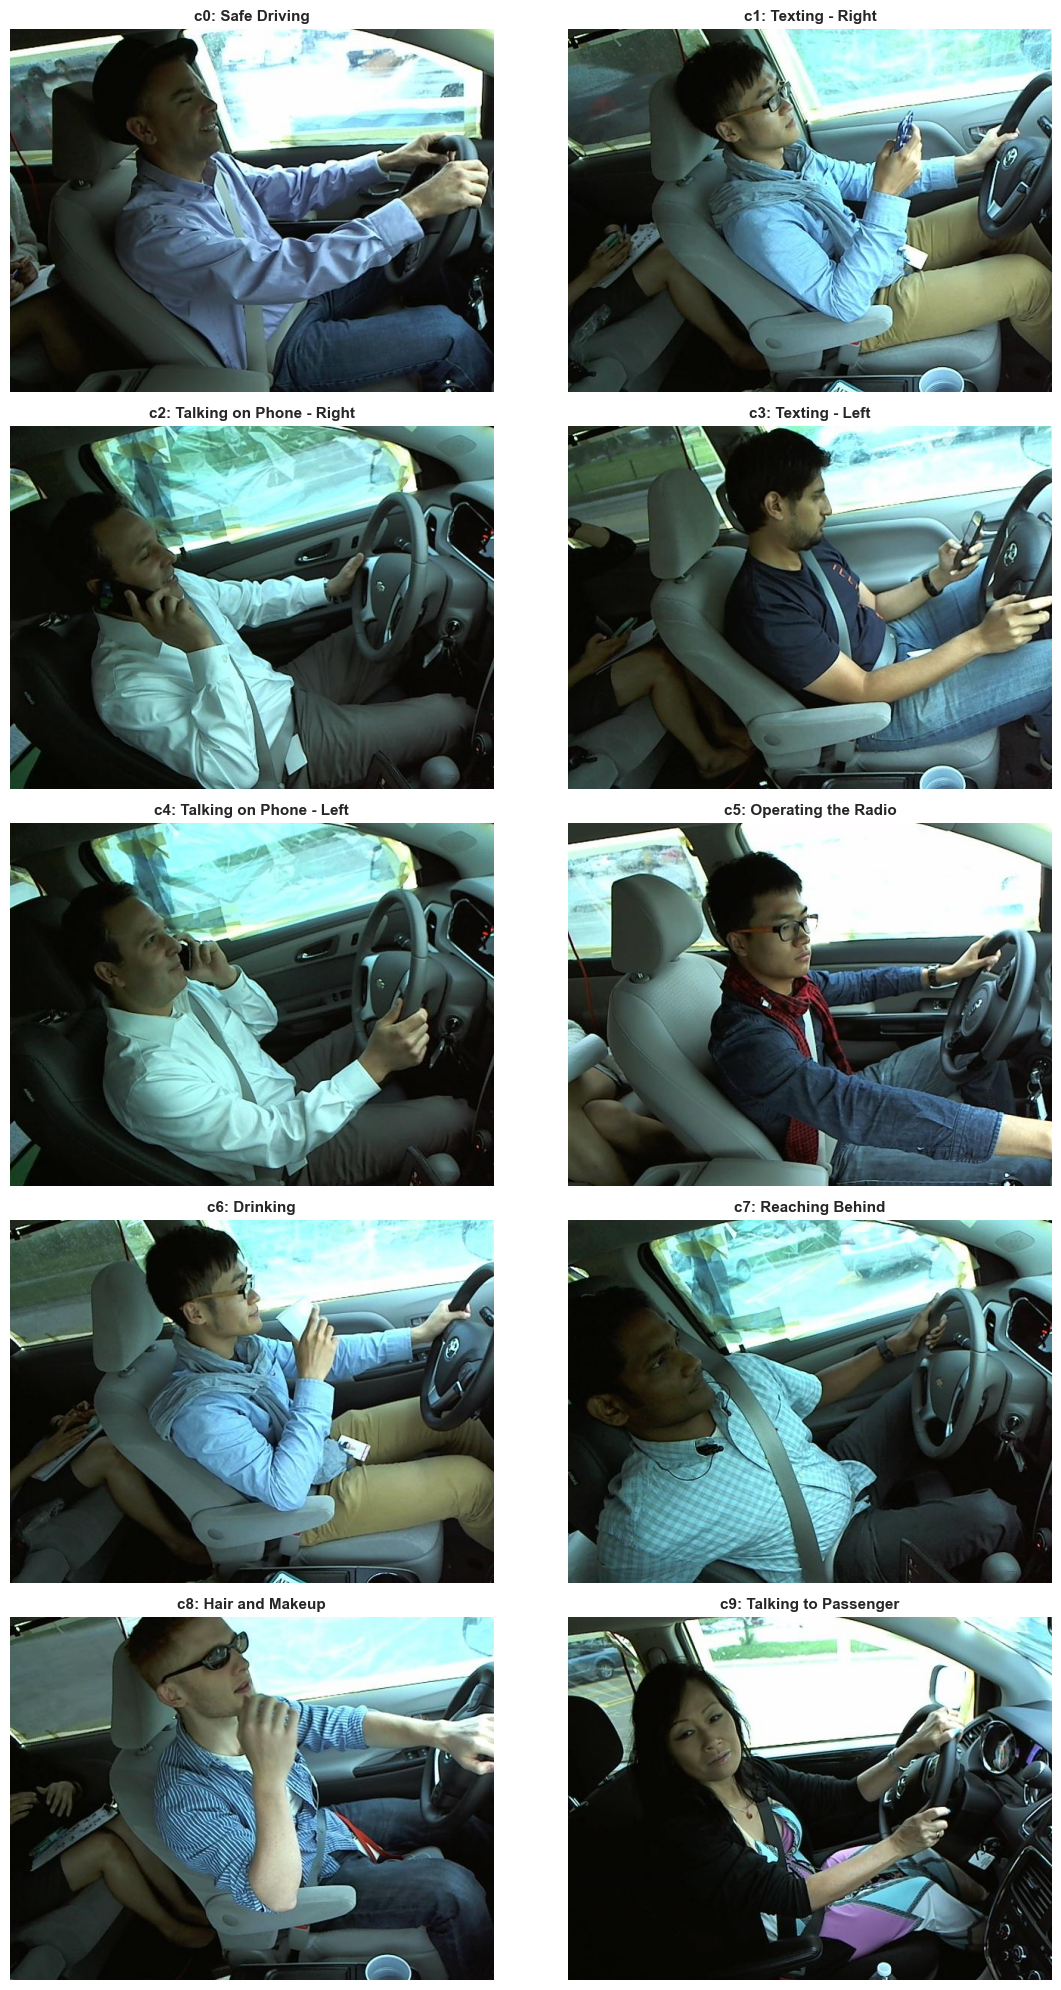


Sample images displayed for all classes


In [9]:
class_names = {
    'c0': 'Safe Driving',
    'c1': 'Texting - Right',
    'c2': 'Talking on Phone - Right',
    'c3': 'Texting - Left',
    'c4': 'Talking on Phone - Left',
    'c5': 'Operating the Radio',
    'c6': 'Drinking',
    'c7': 'Reaching Behind',
    'c8': 'Hair and Makeup',
    'c9': 'Talking to Passenger'
}

print("\n" + "=" * 60)
print("SAMPLE IMAGES FROM EACH CLASS")
print("=" * 60)

fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.flatten()

for idx, (cls, name) in enumerate(class_names.items()):
    class_imgs = df[df['classname'] == cls]
    sample = class_imgs.sample(1).iloc[0]
    img_path = os.path.join('state-farm-distracted-driver-detection/imgs/train', cls, sample['img'])
    
    try:
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(f'{cls}: {name}', fontsize=11, fontweight='bold')
        axes[idx].axis('off')
    except Exception as e:
        axes[idx].text(0.5, 0.5, f'Error loading {cls}', ha='center', va='center')
        axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("\nSample images displayed for all classes")


In [11]:
print("\n" + "=" * 60)
print("DATA QUALITY SUMMARY REPORT")
print("=" * 60)

print(f"\nTotal Images: {len(df)}")
print(f"Total Classes: {len(df['classname'].unique())}")
print(f"Unique Drivers: {len(df['subject'].unique())}")
print(f"\nClass Distribution:")

for cls in sorted(df['classname'].unique()):
    count = len(df[df['classname'] == cls])
    percentage = (count / len(df)) * 100
    print(f"  {cls} ({class_names.get(cls, 'Unknown')}): {count:5d} images ({percentage:5.1f}%)")

print(f"\nImage Format: JPEG")
print(f"Image Size: 640x480 pixels")
print(f"File Size: ~20-50 KB per image")
print(f"Missing Values: None")
print(f"Data Status: Clean and ready for preprocessing")



DATA QUALITY SUMMARY REPORT

Total Images: 22424
Total Classes: 10
Unique Drivers: 26

Class Distribution:
  c0 (Safe Driving):  2489 images ( 11.1%)
  c1 (Texting - Right):  2267 images ( 10.1%)
  c2 (Talking on Phone - Right):  2317 images ( 10.3%)
  c3 (Texting - Left):  2346 images ( 10.5%)
  c4 (Talking on Phone - Left):  2326 images ( 10.4%)
  c5 (Operating the Radio):  2312 images ( 10.3%)
  c6 (Drinking):  2325 images ( 10.4%)
  c7 (Reaching Behind):  2002 images (  8.9%)
  c8 (Hair and Makeup):  1911 images (  8.5%)
  c9 (Talking to Passenger):  2129 images (  9.5%)

Image Format: JPEG
Image Size: 640x480 pixels
File Size: ~20-50 KB per image
Missing Values: None
Data Status: Clean and ready for preprocessing
